In [2]:
pip install pandas seaborn openpyxl numpy scipy wordcloud pymorphy3 nltk razdel sentence_transformers wiki-ru-wordnet

     ---------------------------------------- 0.0/20.6 MB ? eta -:--:--
     - -------------------------------------- 0.5/20.6 MB 12.8 MB/s eta 0:00:02
     ------ --------------------------------- 3.4/20.6 MB 8.9 MB/s eta 0:00:02
     ---------- ----------------------------- 5.2/20.6 MB 10.3 MB/s eta 0:00:02
     -------------- ------------------------- 7.3/20.6 MB 10.0 MB/s eta 0:00:02
     ------------------ --------------------- 9.4/20.6 MB 9.6 MB/s eta 0:00:02
     ------------------- -------------------- 10.2/20.6 MB 8.3 MB/s eta 0:00:02
     ----------------------- ---------------- 12.1/20.6 MB 8.4 MB/s eta 0:00:02
     ---------------------------- ----------- 14.7/20.6 MB 9.1 MB/s eta 0:00:01
     ------------------------------ --------- 15.7/20.6 MB 9.1 MB/s eta 0:00:01
     ---------------------------------- ----- 17.8/20.6 MB 8.8 MB/s eta 0:00:01
     -------------------------------------- - 19.9/20.6 MB 8.9 MB/s eta 0:00:01
     ---------------------------------------- 20.6

  DEPRECATION: Building 'wiki-ru-wordnet' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wiki-ru-wordnet'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('raw_data.csv') # изменить путь
df

,idx,text,label
0,10026,[PERSON]\n\nУважаемый [PERSON]!\n\n[ORGANIZATI...,Блок директора по проектированию
1,1005,[ORGANIZATION] инжиниринг общество с ограничен...,Блок деректора по газу
2,1010,[ORGANIZATION] ИНВЕСТ Общество с ограниченной ...,Блок заместителя генерального директора по без...
3,1013,[ORGANIZATION] филиал [OBJECT] имени [PERSON] ...,Блок технического директора
4,10186,[ORGANIZATION] ЗАМЕСТИТЕЛЬ ГЕНЕРАЛЬНОГО ДИРЕКТ...,Блок директора по проектированию
...,...,...,...
1416,7295,[ORGANIZATION] юридический адрес: [LOCATION] О...,Блок технического директора
1417,7296,[ORGANIZATION] сообщает [PERSON] о готовности ...,Блок технического директора
1418,7297,[ORGANIZATION] Юридический адрес: [LOCATION] О...,Блок технического директора
1419,27278G,ООО [НАЗВАНИЕ_КОМПАНИИ] Контактная информация:...,Проект «Трубопроводный транспорт Ещё одного НГКМ»


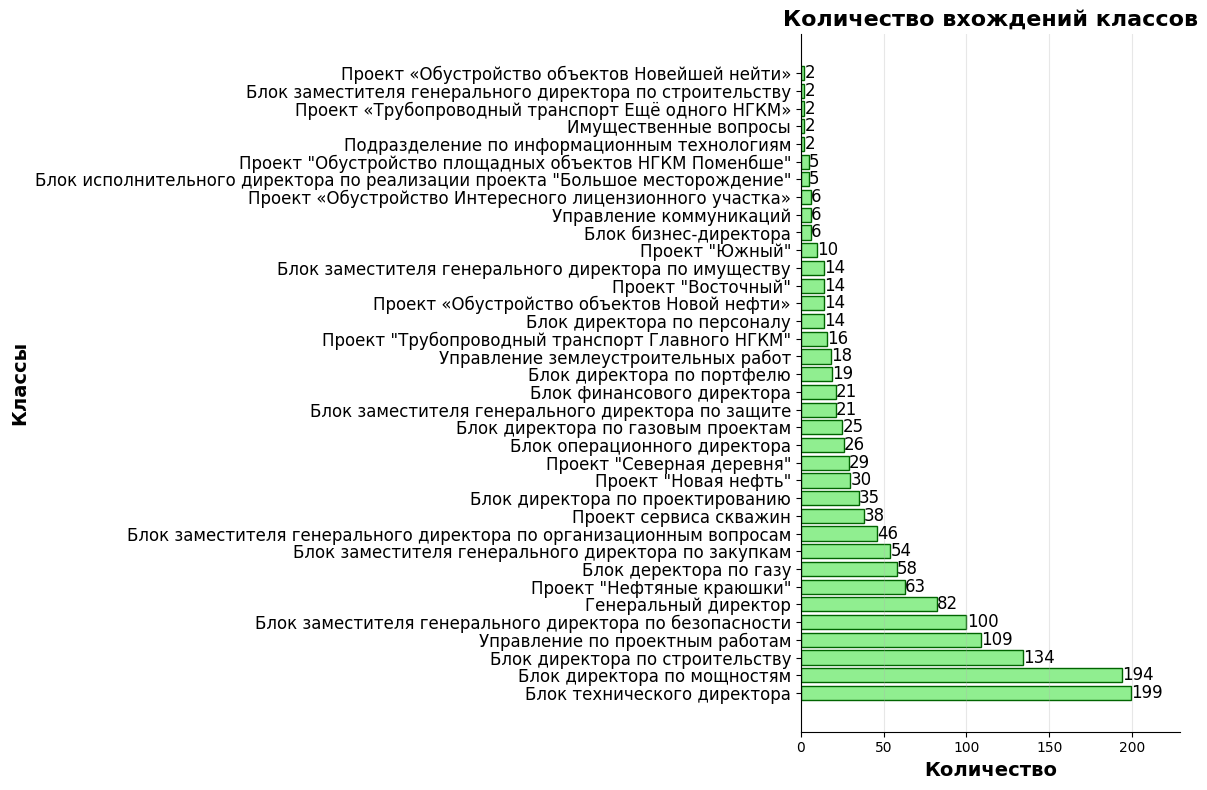

In [12]:
# Распределение меток (классов)
lbs = df['label']
lbs_uniq = lbs.unique()

# Считаем количество меток и сортируем их
lbs_uniq_count = {}
for i in lbs_uniq:
    lbs_uniq_count[i] = len(list(filter(lambda x: x == i, lbs)))
lbs_uniq_count = sorted(lbs_uniq_count.items(), key=lambda item: -item[1]) 

# Выводим в виде гистограммы
df_lbs_count = pd.DataFrame(lbs_uniq_count, columns=['string', 'count'])
    
fig, ax = plt.subplots(figsize=(12, 8))

# Горизонтальные столбцы
bars = ax.barh(df_lbs_count['string'], df_lbs_count['count'], color='lightgreen', edgecolor='darkgreen')

# Добавляем подписи значений
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
            f'{int(width)}', ha='left', va='center', fontsize=12)

# Настраиваем внешний вид
ax.set_ylabel('Классы', fontsize=14, fontweight='bold')
ax.set_xlabel('Количество', fontsize=14, fontweight='bold')
ax.set_title('Количество вхождений классов', fontsize=16, fontweight='bold')

# Метки на оси Y без поворота
ax.set_yticks(range(len(df_lbs_count['string'])))
ax.set_yticklabels(df_lbs_count['string'], rotation=0, fontsize=12)

ax.grid(axis='x', alpha=0.3)
ax.set_xlim(0, max(df_lbs_count['count']) * 1.15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [10]:
lbs_uniq_count

[('Блок технического директора', 199),
 ('Блок директора по мощностям', 194),
 ('Блок директора по строительству', 134),
 ('Управление по проектным работам', 109),
 ('Блок заместителя генерального директора по безопасности', 100),
 ('Генеральный директор', 82),
 ('Проект "Нефтяные краюшки"', 63),
 ('Блок деректора по газу', 58),
 ('Блок заместителя генерального директора по закупкам', 54),
 ('Блок заместителя генерального директора по организационным вопросам', 46),
 ('Проект сервиса скважин', 38),
 ('Блок директора по проектированию', 35),
 ('Проект "Новая нефть"', 30),
 ('Проект "Северная деревня"', 29),
 ('Блок операционного директора', 26),
 ('Блок директора по газовым проектам', 25),
 ('Блок заместителя генерального директора по защите', 21),
 ('Блок финансового директора', 21),
 ('Блок директора по портфелю', 19),
 ('Управление землеустроительных работ', 18),
 ('Проект "Трубопроводный транспорт Главного НГКМ"', 16),
 ('Блок директора по персоналу', 14),
 ('Проект «Обустройство об

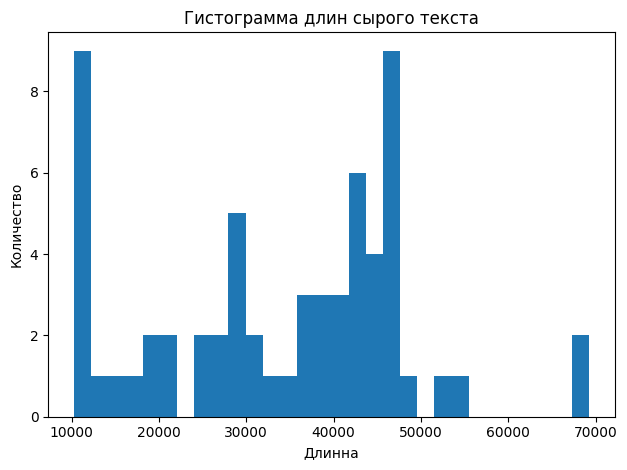

In [ ]:
data = pd.DataFrame(filter(lambda x: x > 10000, map(len, df['text'])))

plt.figure()
plt.hist(data, bins=30)
plt.title("Гистограмма длин сырого текста")
plt.xlabel("Длинна"); plt.ylabel("Количество")
plt.tight_layout(); plt.show()